<h2><a href="https://leetcode.com/problems/maximum-gap">164. Maximum Gap</a></h2><h3>Medium</h3><hr><p>Given an integer array <code>nums</code>, return <em>the maximum difference between two successive elements in its sorted form</em>. If the array contains less than two elements, return <code>0</code>.</p>

<p>You must write an algorithm that runs in linear time and uses linear extra space.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [3,6,9,1]
<strong>Output:</strong> 3
<strong>Explanation:</strong> The sorted form of the array is [1,3,6,9], either (3,6) or (6,9) has the maximum difference 3.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [10]
<strong>Output:</strong> 0
<strong>Explanation:</strong> The array contains less than 2 elements, therefore return 0.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= nums.length &lt;= 10<sup>5</sup></code></li>
	<li><code>0 &lt;= nums[i] &lt;= 10<sup>9</sup></code></li>
</ul>


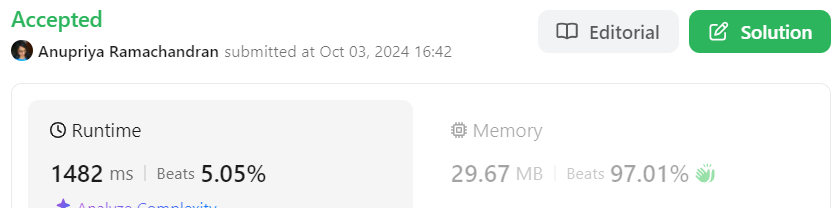

# Using Radix Sort

In [1]:
from typing import List

class Solution:
    def maximumGap(self, nums: List[int]) -> int:
        if len(nums) < 2:
            return 0
            
        self.radix_sort(nums)
        max_gap = 0
        for i in range(len(nums) - 1):
            diff = nums[i + 1] - nums[i]
            if diff > max_gap:
                max_gap = diff
        return max_gap

    def radix_sort(self, nums):
        max_val = max(nums)

        exp = 1
        while max_val//exp > 0:
            self.counting_sort(nums, exp)
            exp *= 10
        
    def counting_sort(self, nums, exp):
        count = [0] * 10
        output = [0] * len(nums)

        # count freqeuncy
        for num in nums:
            digit = (num//exp)% 10
            count[digit] += 1


        #  cumulative freqeuncy
        for i in range(1, len(count)):
            count[i] += count[i-1]

        # Update output
        for i in range(len(nums) - 1, -1, -1):
            digit = (nums[i]//exp)% 10
            output[count[digit] - 1] = nums[i]
            count[digit] -= 1

        # reset nums
        for i in range(len(nums)):
            nums[i] = output[i]

## Using heapq
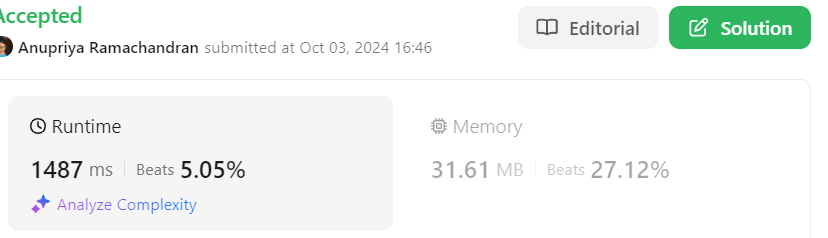

In [2]:
import heapq

class Solution:
    def maximumGap(self, nums: List[int]) -> int:
        self.radix_sort(nums)
        max_gap = 0
        if len(nums) < 2:
            return 0

        maxheap = []
        for i in range(len(nums) - 1):
            diff = nums[i + 1] - nums[i]
            heapq.heappush(maxheap, - diff)
        return -heapq.heappop(maxheap)


    def radix_sort(self, nums):
        max_val = max(nums)
        exp = 1
        while max_val//exp > 0:
            self.counting_sort(nums, exp)
            exp *= 10
        
    def counting_sort(self, nums, exp):
        count = [0] * 10
        output = [0] * len(nums)

        # count freqeuncy
        for num in nums:
            digit = (num//exp)% 10
            count[digit] += 1

        #  cumulative freqeuncy
        for i in range(1, len(count)):
            count[i] += count[i-1]

        # Update output
        for i in range(len(nums) - 1, -1, -1):
            digit = (nums[i]//exp)% 10
            output[count[digit] - 1] = nums[i]
            count[digit] -= 1

        # reset nums
        for i in range(len(nums)):
            nums[i] = output[i]


## <italic> Only using Heapq </italic>
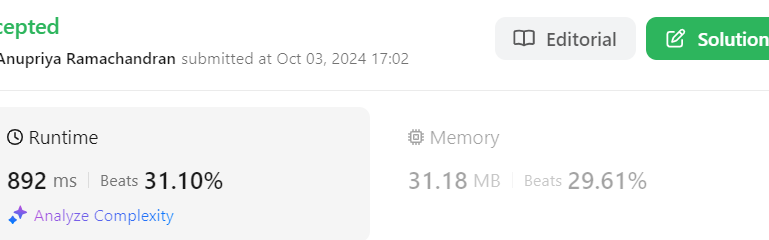

In [3]:
import heapq

class Solution:
    def maximumGap(self, nums: List[int]) -> int:
        if len(nums) < 2:
            return 0

        minheap = []
        for num in nums:
            heapq.heappush(minheap, num)

        max_diff = float(-inf)
        while minheap:
            num1 = heapq.heappop(minheap)
            if minheap:
                max_diff = max(max_diff, (minheap[0] - num1))

        return max_diff

## Heapify

In [4]:
import heapq
class Solution:
    def maximumGap(self, nums: List[int]) -> int:
        if len(nums) < 2:
            return 0

        minheap = []
        minheap = nums
        heapq.heapify(minheap)

        max_diff = float(-inf)
        while minheap:
            num1 = heapq.heappop(minheap)
            if minheap:
                max_diff = max(max_diff, (minheap[0] - num1))

        return max_diff

# Radix Sort - Time Complexity
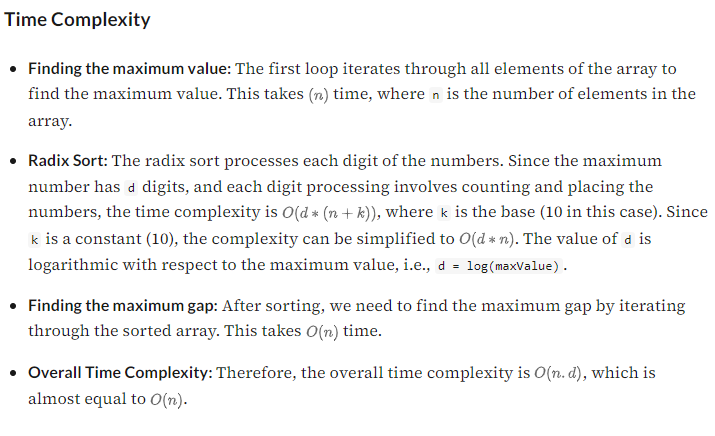

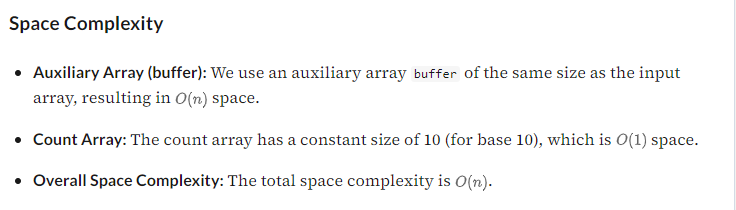